AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [3]:


import pandas as pd
from io import StringIO


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


first_10_rows = df.head(10)

last_20_rows = df.tail(20)


info_buffer = StringIO()
df.info(buf=info_buffer)
dataset_info = info_buffer.getvalue()


dataset_description = df.describe()


combined_output = {
    "First 10 Rows": first_10_rows,
    "Last 20 Rows": last_20_rows,
    "Dataset Information": dataset_info,
    "Dataset Description": dataset_description
}


for section, data in combined_output.items():
    print(f"\n{section}:\n")
    print(data)



First 10 Rows:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timo

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


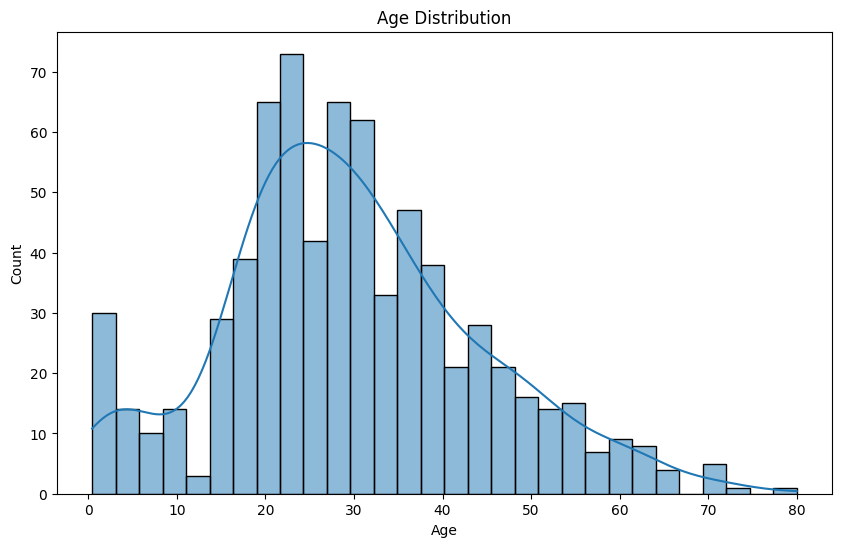

C:\Users\23249\AppData\Local\Temp\ipykernel_11972\364543704.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)
C:\Users\23249\AppData\Local\Temp\ipykernel_11972\364543704.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

missing_values = df.isnull().sum()


plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


age_median = df['Age'].median()


df['Age'].fillna(age_median, inplace=True)


df.drop('Cabin', axis=1, inplace=True)


df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


df = df[df['Survived'].isin([0, 1])]


df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

In [9]:
# 1. Average fare grouped by Pclass
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("\nAverage Fare by Pclass:\n", average_fare_by_class)



Average Fare by Pclass:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

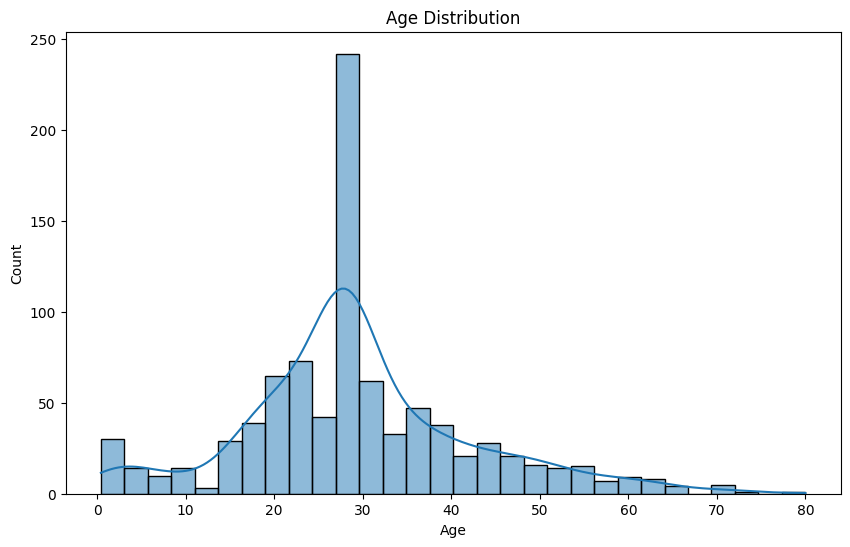

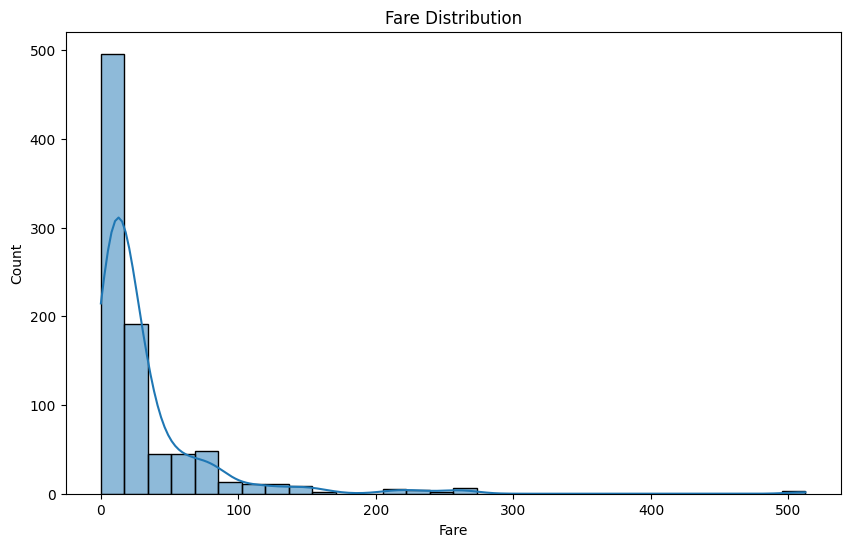

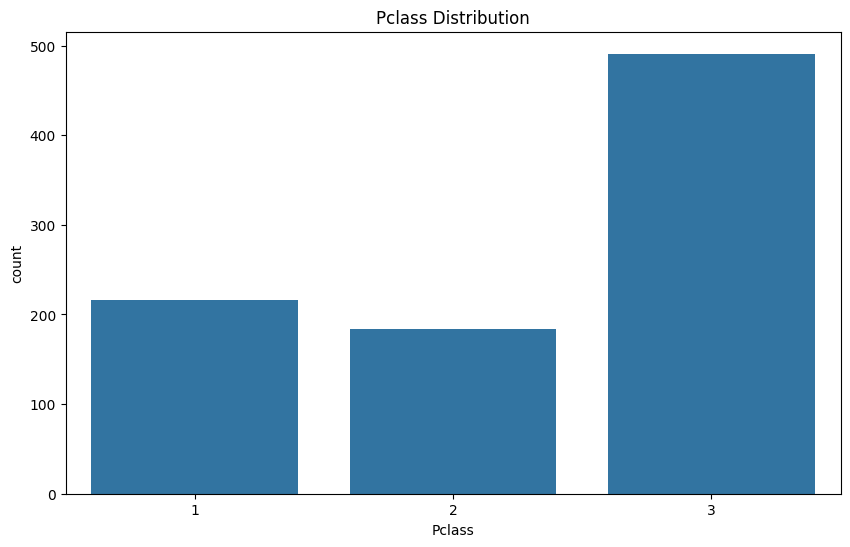

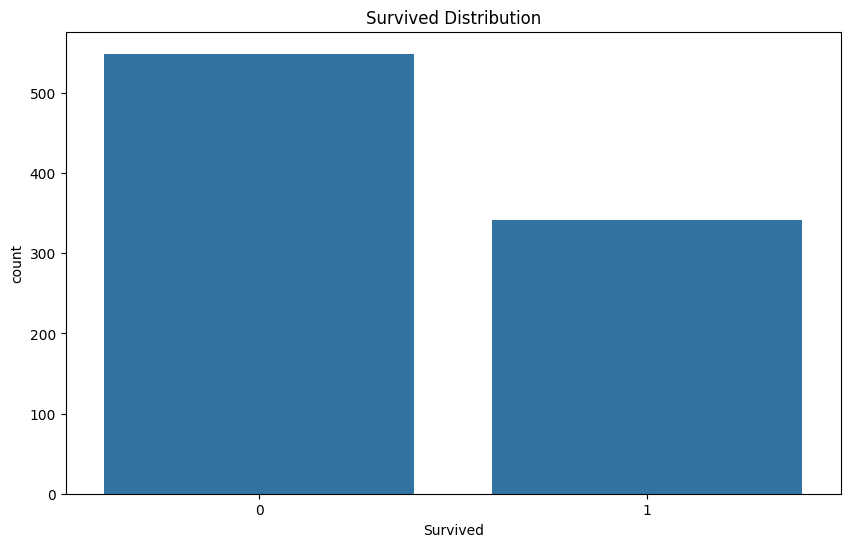

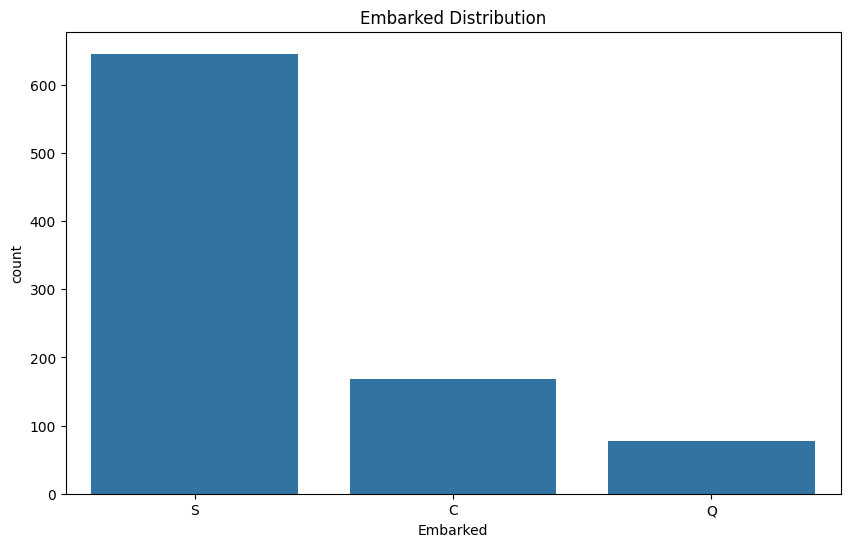

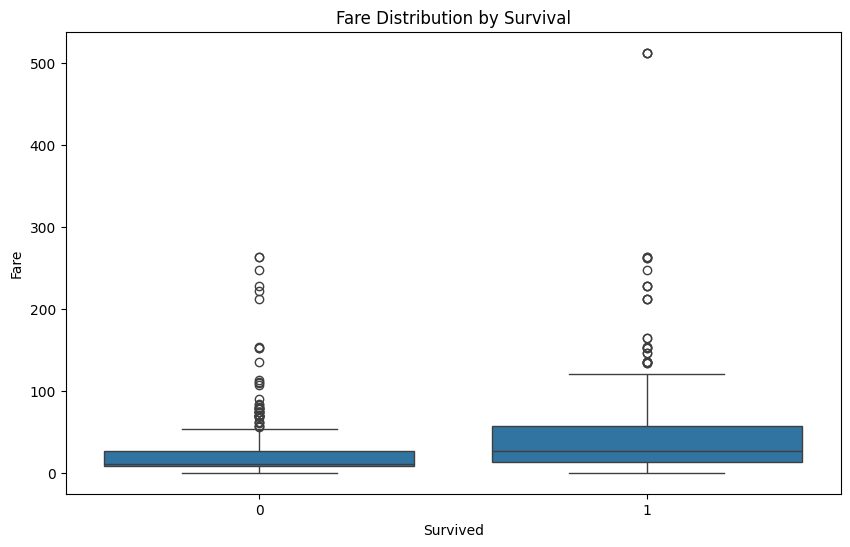

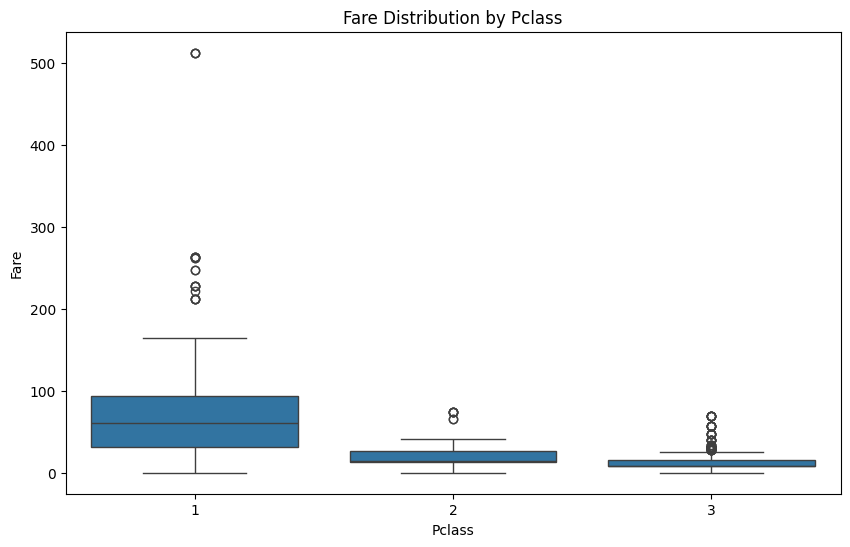

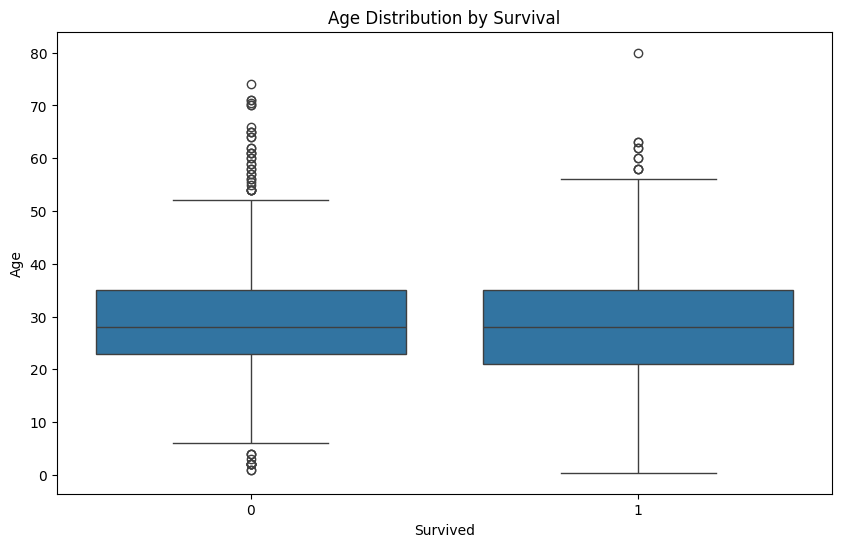

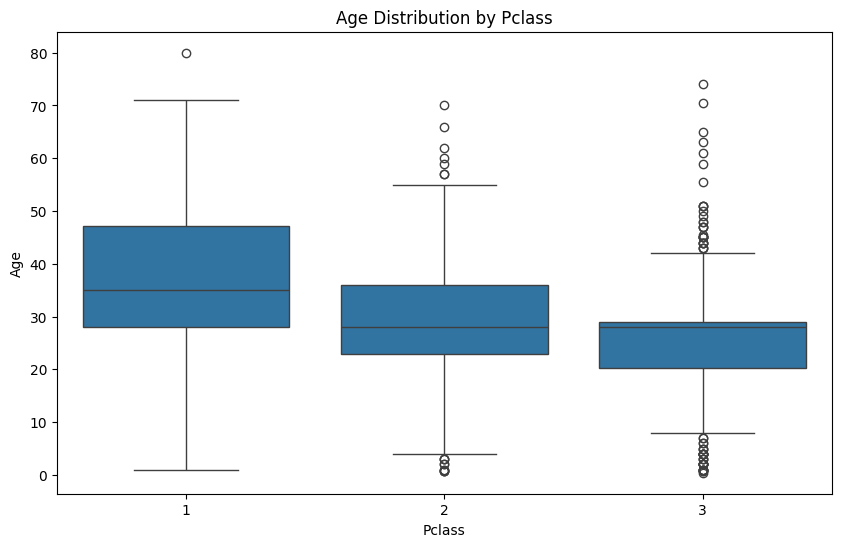

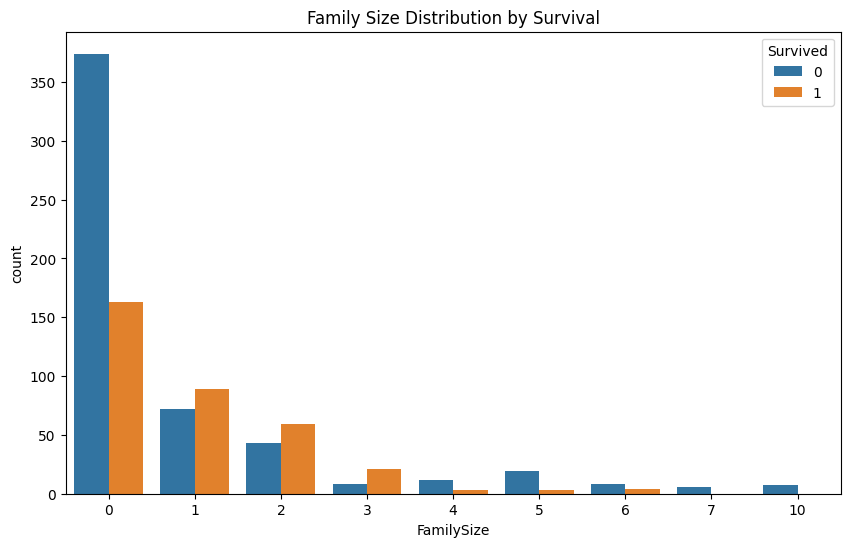

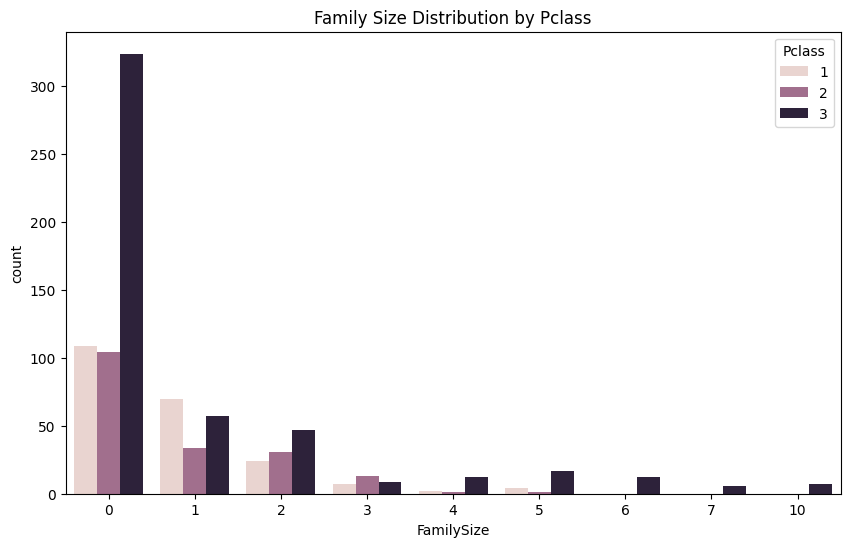

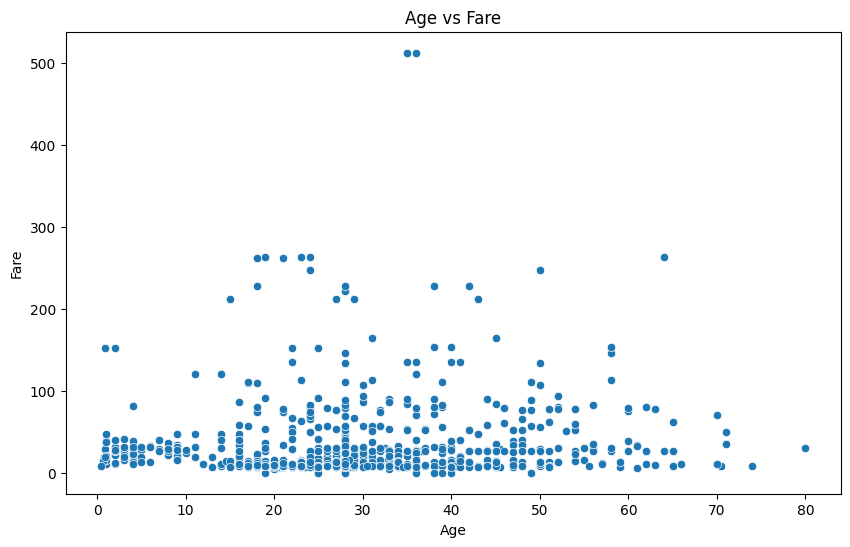

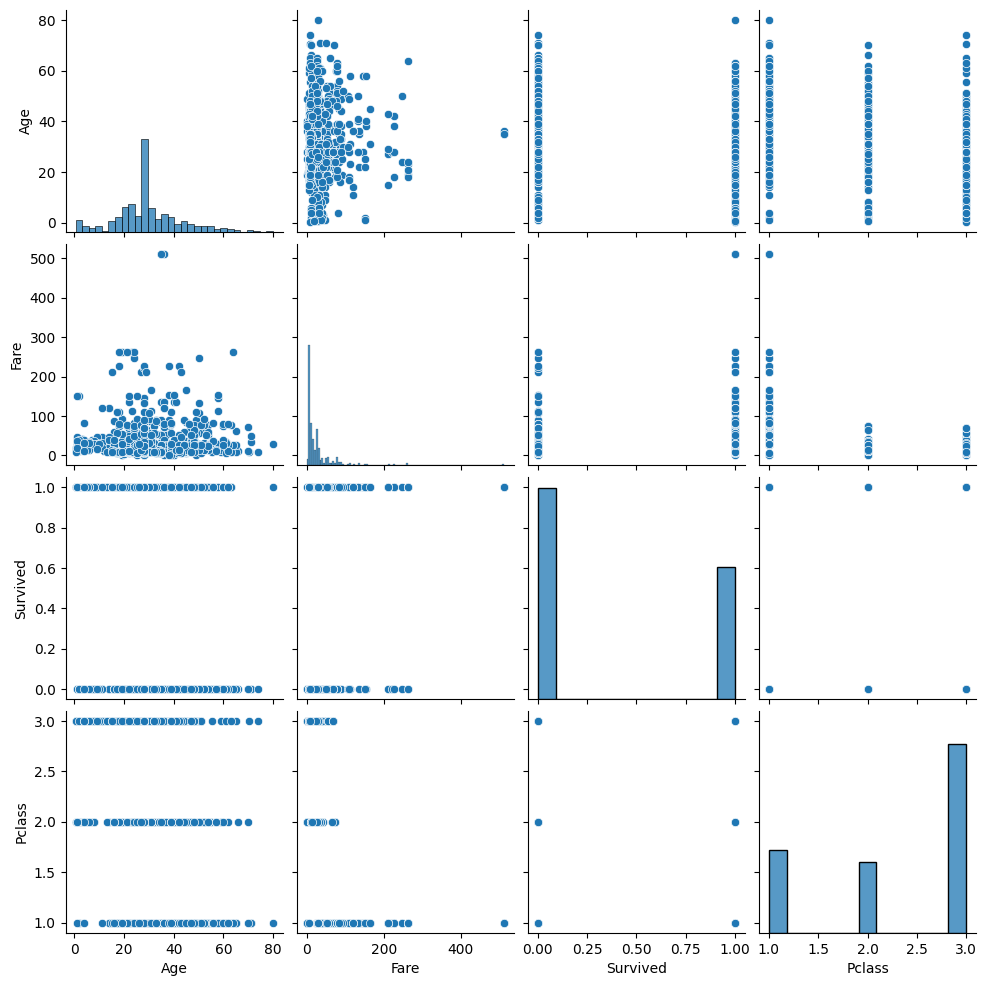


Average Fare by Sex:
 Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


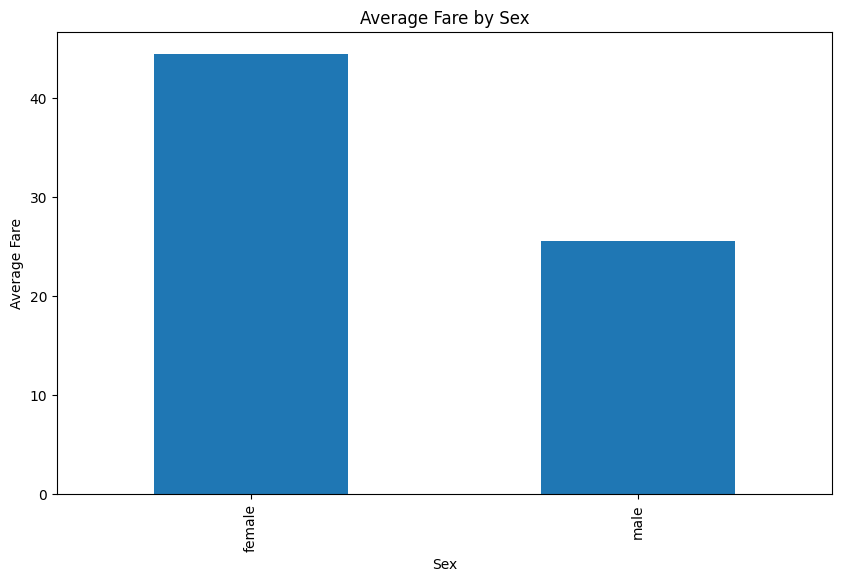

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survived Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()


df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Family Size Distribution by Survival')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Pclass', data=df)
plt.title('Family Size Distribution by Pclass')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.show()


# Example: Pairplot of selected features
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']])
plt.show()


average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("\nAverage Fare by Sex:\n", average_fare_by_sex)


plt.figure(figsize=(10, 6))
average_fare_by_sex.plot(kind='bar')
plt.title('Average Fare by Sex')
plt.ylabel('Average Fare')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [13]:


numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:\n", correlation_matrix)

age_fare_correlation = df['Age'].corr(df['Fare'])
print("\nCorrelation between 'Age' and 'Fare':", age_fare_correlation)

print("\nCorrelation Coefficients with 'Age':\n")
for column in numeric_df.columns:
    if column != 'Age':
        correlation = df['Age'].corr(df[column])
        print(f"Correlation between 'Age' and '{column}': {correlation}")




Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.245619  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.096688   -0.245619  
SibSp        0.159651    0.890712  
Parch        0.216225    0.783111  
Fare         1.000000  